<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.4_n250.csv',
 'data_add_delta_-2.4_n120.csv',
 'data_add_delta_-2.4_n60.csv',
 'data_add_delta_-2.4_n30.csv',
 'data_add_delta_-2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    70.983326  74.304104  38.905081  ...  194.195311  194.194356  0.000955
      1.0    86.809174  63.271046  79.278543  ...  239.369154  239.358760  0.010395
      2.0    63.538876  44.139242  42.828862  ...  160.496852  160.506803 -0.009951
      3.0    63.733601  39.051019  71.560441  ...  184.354230  184.345709  0.008521
      4.0    63.295718  32.287796  95.088108  ...  200.671915  200.672747 -0.000832
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   71.694820  83.117829  62.165421  ...  226.978662  226.982019 -0.003358
      16.0   54.636273  76.440333  57.774477  ...  198.854186  198.850929  0.003257
      17.0   22.298031  27.923939  95.937221  ...  156.140076  156.144842 -0.004766
      18.0   74.424075  78.718408  82.354494  ...  245.498292  245.500648 -0.002356
      19.0   66.800770  58.963673  85.139107  ...  220.901782  220.902327 -0.000545

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    70.983326  74.304104  38.905081  ...  194.195311  194.194356  0.000955
      1.0    86.809174  63.271046  79.278543  ...  239.369154  239.358760  0.010395
      2.0    63.538876  44.139242  42.828862  ...  160.496852  160.506803 -0.009951
      3.0    63.733601  39.051019  71.560441  ...  184.354230  184.345709  0.008521
      4.0    63.295718  32.287796  95.088108  ...  200.671915  200.672747 -0.000832
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   71.694820  83.117829  62.165421  ...  226.978662  226.982019 -0.003358
      16.0   54.636273  76.440333  57.774477  ...  198.854186  198.850929  0.003257
      17.0   22.298031  27.923939  95.937221  ...  156.140076  156.144842 -0.004766
      18.0   74.424075  78.718408  82.354494  ...  245.498292  245.500648 -0.002356
      19.0   66.800770  58.963673  85.139107  ...  220.901782  220.902327 -0.000545

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,70.983326,74.304104,38.905081,0.002800,194.195311,194.194356,0.000955
1,0.0,1.0,86.809174,63.271046,79.278543,0.010392,239.369154,239.358760,0.010395
2,0.0,2.0,63.538876,44.139242,42.828862,-0.010128,160.496852,160.506803,-0.009951
3,0.0,3.0,63.733601,39.051019,71.560441,0.009169,184.354230,184.345709,0.008521
4,0.0,4.0,63.295718,32.287796,95.088108,0.000294,200.671915,200.672747,-0.000832
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.694820,83.117829,62.165421,0.000592,226.978662,226.982019,-0.003358
19996,999.0,16.0,54.636273,76.440333,57.774477,0.003104,198.854186,198.850929,0.003257
19997,999.0,17.0,22.298031,27.923939,95.937221,-0.019115,156.140076,156.144842,-0.004766
19998,999.0,18.0,74.424075,78.718408,82.354494,0.001315,245.498292,245.500648,-0.002356


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    70.983326  74.304104  38.905081  ...  194.195311  194.194356  0.000955
      1.0    86.809174  63.271046  79.278543  ...  239.369154  239.358760  0.010395
      2.0    63.538876  44.139242  42.828862  ...  160.496852  160.506803 -0.009951
      3.0    63.733601  39.051019  71.560441  ...  184.354230  184.345709  0.008521
      4.0    63.295718  32.287796  95.088108  ...  200.671915  200.672747 -0.000832
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   71.694820  83.117829  62.165421  ...  226.978662  226.982019 -0.003358
      16.0   54.636273  76.440333  57.774477  ...  198.854186  198.850929  0.003257
      17.0   22.298031  27.923939  95.937221  ...  156.140076  156.144842 -0.004766
      18.0   74.424075  78.718408  82.354494  ...  245.498292  245.500648 -0.002356
      19.0   66.800770  58.963673  85.139107  ...  220.901782  220.902327 -0.000545

[20000 rows x 7 columns]

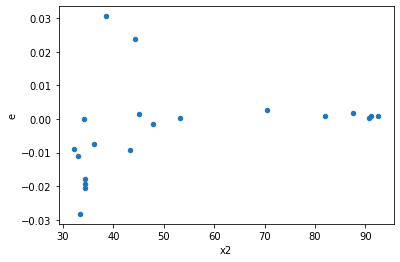

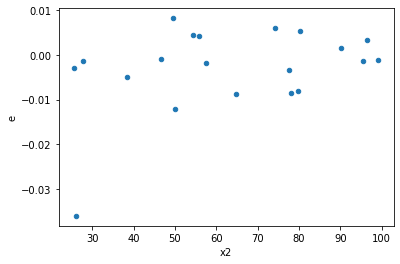

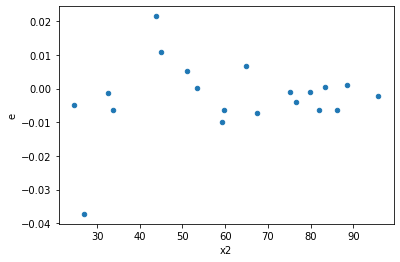

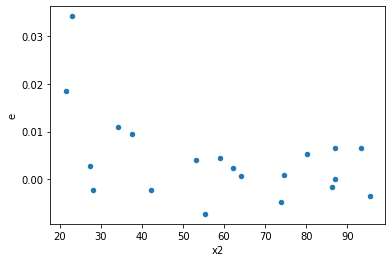

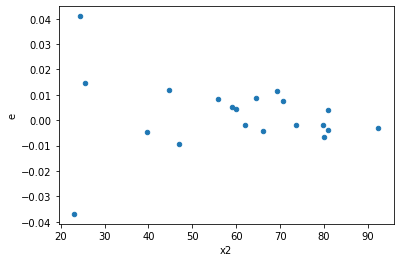

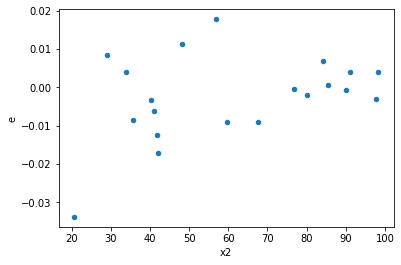

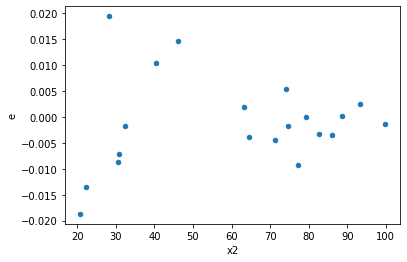

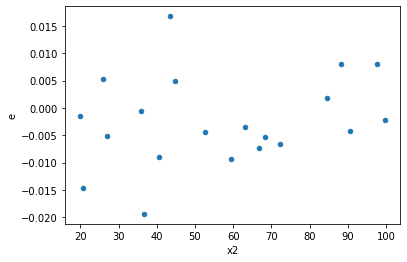

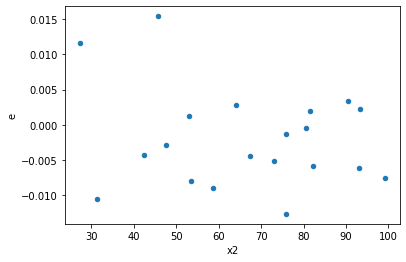

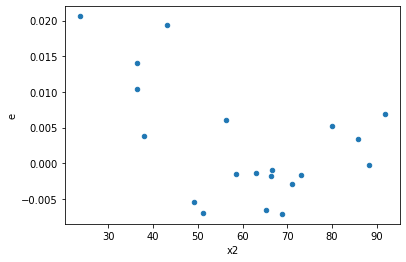

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
44.0,5.0,5.0,9.843847864173353e-05,0.00010978208979801432,1.9687695728346705e-05,2.1956417959602866e-05,1.1152355391184563,0.9076510659487713,0.5461744670256143,0.45382553297438566,Reject005=1 : Homoscedasticity
45.0,5.0,5.0,3.512932418380684e-05,6.429667840166484e-05,7.025864836761368e-06,1.2859335680332967e-05,1.8302850935943404,0.5231308653177456,0.7384345673411272,0.2615654326588728,Reject005=1 : Homoscedasticity
116.0,5.0,5.0,0.00010499382674477769,0.00022302062612671223,2.099876534895554e-05,4.460412522534245e-05,2.124130846938628,0.427911112905595,0.7860444435472025,0.2139555564527975,Reject005=1 : Homoscedasticity
134.0,5.0,5.0,3.778013566997328e-05,0.00024488821719875,7.556027133994657e-06,4.897764343975e-05,6.481930592784533,0.0610648242584666,0.9694675878707667,0.0305324121292333,Reject005=1 : Homoscedasticity
189.0,5.0,5.0,0.00011724595563296255,0.00011881810140674705,2.344919112659251e-05,2.3763620281349412e-05,1.0134089552624408,0.9886941773162821,0.505652911341859,0.49434708865814103,Reject005=1 : Homoscedasticity
219.0,5.0,5.0,4.9919623661016935e-05,0.00019891881453539553,9.983924732203388e-06,3.9783762907079106e-05,3.9847819343785345,0.15544050449790747,0.9222797477510463,0.07772025224895374,Reject005=1 : Homoscedasticity
236.0,5.0,5.0,0.0002292095444344395,0.00030318213416186606,4.58419088868879e-05,6.063642683237321e-05,1.3227290988686766,0.7663917238809819,0.6168041380595091,0.38319586194049093,Reject005=1 : Homoscedasticity
257.0,5.0,5.0,7.185529815148077e-05,0.0001350793609862895,1.4371059630296154e-05,2.70158721972579e-05,1.8798803214416253,0.5051873459484966,0.7474063270257517,0.2525936729742483,Reject005=1 : Homoscedasticity
258.0,5.0,5.0,1.9537482221265244e-05,5.58585332770742e-05,3.907496444253049e-06,1.117170665541484e-05,2.8590446120163793,0.2736725704001066,0.8631637147999467,0.1368362852000533,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.000953273433487867,0.00012717824666635453,0.0001906546866975734,2.5435649333270905e-05,0.13341213779663483,0.04528530048855653,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,0.002445099573462321,6.70931183578231e-05,0.0004890199146924642,1.341862367156462e-05,0.027439830707105966,0.0012304093783614101,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,0.0005306127354578863,5.938110114586737e-05,0.00010612254709157725,1.1876220229173474e-05,0.1119104333118298,0.03122597845636405,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.0005987329275534501,0.00012408959899992298,0.00011974658551069002,2.4817919799984597e-05,0.20725367403289383,0.1091058409630472,Reject005=1 : Homoscedasticity
4.0,5.0,5.0,0.0002061964082973861,0.00010871325687331987,4.123928165947722e-05,2.1742651374663974e-05,0.5272315738716871,0.4992896171542399,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.0002675013746824193,7.011426198149328e-05,5.3500274936483864e-05,1.4022852396298655e-05,0.2621080436118645,0.16800598985536105,Reject005=1 : Homoscedasticity
6.0,5.0,5.0,0.0001992280792670696,5.3307140841861045e-05,3.984561585341392e-05,1.0661428168372209e-05,0.26756841223370753,0.1742502159752933,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,0.0002237626538381474,5.3517512408212984e-05,4.475253076762948e-05,1.0703502481642597e-05,0.23917088705483183,0.14246353621631772,Reject005=1 : Homoscedasticity
8.0,5.0,5.0,0.0012665947473361144,3.0275399660105856e-05,0.0002533189494672229,6.055079932021171e-06,0.023902988484501994,0.000882189942632331,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    532
Reject005=1 : Homoscedasticity      468
Name: Result_test, dtype: int64